# Домашнее задание 3. 

## Предсказание пользовательской оценки отеля по тексту отзыва.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать [тут](https://www.kaggle.com/c/hseds-texts-2020/data?select=train.csv).

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :( 

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Удачи! 💪

#### Использовать внешние данные для обучения строго запрещено. Можно использовать предобученные модели из torchvision.

In [3]:
!wget https://www.dropbox.com/s/vjenzws8velxh32/test.csv
!wget https://www.dropbox.com/s/9xwbmexkmv6d7y4/train.csv

--2020-12-22 06:44:24--  https://www.dropbox.com/s/vjenzws8velxh32/test.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vjenzws8velxh32/test.csv [following]
--2020-12-22 06:44:24--  https://www.dropbox.com/s/raw/vjenzws8velxh32/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7ac7469a447c1117bc97e9d4a.dl.dropboxusercontent.com/cd/0/inline/BFh9wVWMjy9bn9ITw99YLdDUMHwbB6jZ2zrmajMlAi8jzSLPndAK0J3xDO4a6vOWBL3m1YJvXZdF9anUgbiHi2Ag-5l2rUNLq3cVJEZN4jS0hXORVXlwhoWyG0Zb__7fJ9k/file# [following]
--2020-12-22 06:44:24--  https://ucf7ac7469a447c1117bc97e9d4a.dl.dropboxusercontent.com/cd/0/inline/BFh9wVWMjy9bn9ITw99YLdDUMHwbB6jZ2zrmajMlAi8jzSLPndAK0J3xDO4a6vOWBL3m1YJvXZdF9anUgbiHi2Ag-5l2rUNLq3cVJEZN4jS0hXORVXlwhoWyG0Z

In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [2]:
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

noise = ['the', 'a', 'an', 'at', 'and', 'for', 'of', 'or', 'on', 'in', 'to', 'this', 'that', 'be', 'there', 'is', 'was', 'are', 'were',
         'i', 'me', 'we', 'as', 'it', 'by', 'so', 'from', 'my', 'with']
exclude = set(string.punctuation)
#exclude.update(noise)
stop_words = stopwords.words('english')
#stop_words.remove('no')
#stop_words.remove('not')
#stop_words.append('negative')
exclude.update(stop_words)

def process_text(text):
    return ' '.join([word for word in word_tokenize(text.lower()) if word not in exclude])

def process_text2tokens(text):
    return [word for word in word_tokenize(text.lower()) if word not in exclude]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#df['negative'] = df['negative'].apply(process_text)
#df['positive'] = df['positive'].apply(process_text)

In [3]:
df['review'] = df['negative'] + ' ' + df['positive']
#df['review'] = str(df['review'])
df['tokens'] = df['review'].apply(process_text2tokens)
df['review'] = df['review'].apply(process_text)

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)

In [5]:
df_train.head()

,review_id,negative,positive,score,review,tokens
90356,e72b6c270b897b5eab79e6a34ee9f93c,No Negative,ALWAYS GOOD,10.0,negative always good,"[negative, always, good]"
53534,88ff7bdd6ac37329d17a3d02c67b9de3,The hotel is close to the tube That means it ...,The location is fabulous if you are looking f...,9.2,hotel close tube means super convenient totall...,"[hotel, close, tube, means, super, convenient,..."
89707,e57511e30ae172d719253017a4b23163,No Negative,Excellent location friendly helpful staff,10.0,negative excellent location friendly helpful s...,"[negative, excellent, location, friendly, help..."
40800,68ae7309f46ac65ee90656198c95d84e,When we checked in the first room was smelly ...,Italian restaurant food was good,4.6,checked first room smelly took hour hotel allo...,"[checked, first, room, smelly, took, hour, hot..."
28767,4a11cb3136fbfc9c41f9c7c689821e6d,Four steps up to the lift,Great location and very clean,9.6,four steps lift great location clean,"[four, steps, lift, great, location, clean]"


### Часть 1. 1 балл

Обучите логистическую регрессию на TF-IDF векторах текстов.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression

In [9]:
tfidf = TfidfVectorizer(min_df=50, max_features=50000).fit(list(df_train['review']))

In [10]:
train_x = tfidf.transform(list(df_train['review']))
train_y = df_train['score']

In [11]:
test_x = tfidf.transform(list(df_test['review']))
test_y = df_test['score']

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
train_x[0]

<1x2365 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [15]:
y_pred = lm.predict(test_x)

In [16]:
from sklearn.metrics import mean_absolute_error as MAE_score

In [17]:
MAE_score(test_y, y_pred)

0.9045907127434957

ура уже не 0 за дз

### Часть 2. 3 балла

Обучите логистическую регрессию на усредненных Word2Vec векторах. 

In [18]:
import gensim
from gensim.models import Word2Vec
import numpy as np

In [19]:
model = Word2Vec(list(df_train['tokens']), size=1000, min_count = 50)

In [20]:
def mean_vector(word2vec_model, string):
    # remove out-of-vocabulary words
    string = [word for word in string if word in word2vec_model.vocab]
    if string:
      return np.mean(word2vec_model[string], axis=0)
    else:
      return np.zeros(1000)

trainx=[]
i = 0
for string in df_train['tokens']:
    trainx.append(mean_vector(model.wv, string))
    if i % 10000 == 0:
      print(i)
    i+=1

train_X = np.array(trainx)

0
10000
20000
30000
40000
50000
60000
70000


In [21]:
testx=[]
i = 0
for string in df_test['tokens']:
    testx.append(mean_vector(model.wv, string))
    if i % 10000 == 0:
      print(i)
    i+=1

test_X = np.array(testx)

0
10000
20000


In [22]:
lm.fit(train_X, train_y)
y_pred = lm.predict(testx)
MAE_score(test_y, y_pred)

0.966234700883463

Штош получилось похуже чем на TF-IDF, но что поделать

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [23]:
idf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [24]:
def calc_idf(texts):
    texts = [ idf_dict[word] - 1 for word in texts]
    return texts

In [25]:
trainx=[]
i = 0

for string in df_train['tokens']:
    string = [word for word in string  if word in model.wv.vocab and str(word) in idf_dict]
    if string:
        idfs = calc_idf(string)
        w2vs = model.wv[string]
        strx = []
        for ii in range(len(string)):
            strx.append(w2vs[ii] * idfs[ii])
                          
        trainx.append(np.mean(strx, axis=0))
    else:
        trainx.append(np.zeros(1000))
    
    if i % 10000 == 0:
      print(i)
    i+=1

0
10000
20000
30000
40000
50000
60000
70000


In [26]:
testx=[]
i = 0

for string in df_test['tokens']:
    string = [word for word in string  if word in model.wv.vocab and str(word) in idf_dict]
    if string:
        idfs = calc_idf(string)
        w2vs = model.wv[string]
        strx = []
        for ii in range(len(string)):
            strx.append(w2vs[ii] * idfs[ii])
                          
        testx.append(np.mean(strx, axis=0))
    else:
        testx.append(np.zeros(1000))
    
    if i % 10000 == 0:
      print(i)
    i+=1

0
10000
20000


In [27]:
train_X = np.array(trainx)
test_X = np.array(testx)

In [28]:
lm.fit(train_X, train_y)
y_pred = lm.predict(test_X)
MAE_score(test_y, y_pred)

0.9659285655975172

В принципе качество не сильно улучшилось, но скорее всего проблема в том что я все равно усреднял (из условия не вполне понятно надо ли это было делать) + не подбирал размер эмбеддинга

Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 
#### Сделайте выводы:

In [29]:
def mean_vector(word2vec_model, string, e):
    string = [word for word in string if word in word2vec_model.vocab]
    if string:
      return np.mean(word2vec_model[string], axis=0)
    else:
      return np.zeros(e)


def textembedding1(w2vmodel, text, e):
    res = []
    i = 0
    for string in text:
        res.append(mean_vector(w2vmodel.wv, string, e))
    
        #if i % 10000 == 0:
        #    print(i)
        #i+=1

    return np.array(res)

def textembedding2(w2vmodel, text, e):
    res = []
    i = 0
    for string in text:
        string = [word for word in string  if word in w2vmodel.wv.vocab and str(word) in idf_dict]
        if string:
            idfs = calc_idf(string)
            w2vs = w2vmodel.wv[string]
            strx = []
            for ii in range(len(string)):
                strx.append(w2vs[ii] * idfs[ii])
                          
            res.append(np.mean(strx, axis=0))
        else:
            res.append(np.zeros(e))
    
        #if i % 10000 == 0:
        #    print(i)
        #i+=1

    return np.array(res)


In [30]:
history_m = []
history_im = []

for i in range(100, 1600, 100):
    print('Embedding: ', i)

    model_i = Word2Vec(list(df_train['tokens']), size=i, min_count = 50)

    train_x_m = textembedding1(model_i, df_train['tokens'], i)
    test_x_m = textembedding1(model_i, df_test['tokens'], i)
    lm.fit(train_x_m, train_y)
    y_pred_m = lm.predict(test_x_m)
    m1 = MAE_score(test_y, y_pred_m)
    print('mean w2v MAE:', m1)
    history_m.append(m1)

    train_x_mi = textembedding2(model_i, df_train['tokens'], i)
    test_x_mi = textembedding2(model_i, df_test['tokens'], i)
    lm.fit(train_x_mi, train_y)
    y_pred_mi = lm.predict(test_x_mi)
    m2 = MAE_score(test_y, y_pred_mi)
    print('IDF w2v MAE:', m2)
    history_im.append(m2)


Embedding:  100
mean w2v MAE: 1.0117697620964856
IDF w2v MAE: 1.0099438899219475
Embedding:  200
mean w2v MAE: 0.9928280232720971
IDF w2v MAE: 0.991608396073197
Embedding:  300
mean w2v MAE: 0.9839783812040752
IDF w2v MAE: 0.980652526683772
Embedding:  400
mean w2v MAE: 0.9802495335563386
IDF w2v MAE: 0.9779603412820319
Embedding:  500
mean w2v MAE: 0.9761492705804202
IDF w2v MAE: 0.9748739077829126
Embedding:  600
mean w2v MAE: 0.973727697927954
IDF w2v MAE: 0.9719845684899494
Embedding:  700
mean w2v MAE: 0.972539121813073
IDF w2v MAE: 0.9719684582473583
Embedding:  800
mean w2v MAE: 0.9694097229834927
IDF w2v MAE: 0.9684561917234308
Embedding:  900
mean w2v MAE: 0.9678558577705466
IDF w2v MAE: 0.9671074201380211
Embedding:  1000
mean w2v MAE: 0.965329872882617
IDF w2v MAE: 0.9648317458431299
Embedding:  1100
mean w2v MAE: 0.9643625987311143
IDF w2v MAE: 0.9638742746952393
Embedding:  1200
mean w2v MAE: 0.9624001737133279
IDF w2v MAE: 0.9617261094765887
Embedding:  1300
mean w2v MAE:

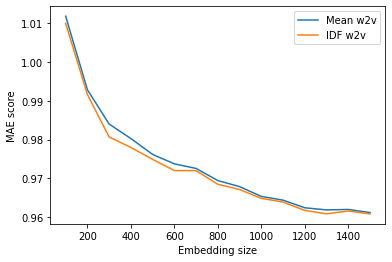

In [31]:
import matplotlib.pyplot as plt
ticks = list(range(100, 1600, 100))
plt.plot(ticks, history_m, label = "Mean w2v")
plt.plot(ticks, history_im, label = "IDF w2v")
plt.legend()
plt.xlabel("Embedding size")
plt.ylabel("MAE score");

Можно увидеть что с увеличением эмбеддинга качество растет, но медленно. При этом IDF в среднем показывает чуть лучшие результаты

Теперь попробуйте обучить логистическую регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.
#### Выводы:

In [32]:
from gensim.models import FastText

In [33]:
modelft = FastText(list(df_train['tokens']), size=300, min_count=50)

In [34]:
train_x_f = textembedding1(modelft, df_train['tokens'], 300)
test_x_f = textembedding1(modelft, df_test['tokens'], 300)
lm.fit(train_x_f, train_y)
y_pred_f = lm.predict(test_x_f)
MAE_score(test_y, y_pred_f)

0.9911032724303668

Если сравнить это с показателями модели на усредненных word2vec, то качество практически не отличается

Embedding:  300

mean w2v MAE: 0.9838634660169936  

### Часть 3. 6 баллов

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [6]:
import torch
from torch import nn
from torch.nn import functional as F
from collections import Counter
import numpy as np

In [36]:
#WORDS = set()
#for sent in list(df['positive']):
#    for w in sent:
#        WORDS.add(w)

#for sent in list(df['negative']):
#    for w in sent:
#        WORDS.add(w)

In [7]:
df['tokens'].apply(len).mean()

18.88795

In [8]:
df = df[df['tokens'].apply(len) < 15]

In [9]:
df = df[df['tokens'].apply(len) > 0]

In [10]:
df['tokens'][-5:]

99991      [nothing, comfortable, rooms, wonderful, place]
99992    [negative, lication, quite, good, facilities, ...
99993    [room, tiny, bed, small, two, ac, noisy, locat...
99997    [terrible, worn, mattress, dust, behind, headb...
99999    [negative, great, breakfast, rooms, clean, loc...
Name: tokens, dtype: object

In [11]:
df['tokens'].apply(len).mean()

7.828974288084048

In [12]:
WORDS = set()

for sent in df['tokens']:
  for w in sent:
    WORDS.add(w)

In [13]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [14]:
#MAX_LEN = max(max(df['positive'].apply(len)), max(df['negative'].apply(len)))
MAX_LEN = max(df['tokens'].apply(len))

In [15]:
MAX_LEN

14

In [16]:
from torch.nn.utils.rnn import pad_sequence

df['pos_pad'] = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in df['tokens']], 
                           batch_first=True)

In [17]:
reviews_ints = []
for review in df['tokens']:
    reviews_ints.append([word2int[word] for word in review])

In [18]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [19]:
pos_pad = pad_features(reviews_ints, seq_length=MAX_LEN)

In [23]:
pos_pad[:2,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
y = np.array(df['score'])

In [25]:
y

array([ 7.1,  7.5, 10. , ...,  5.4,  5. , 10. ])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(pos_pad, y)

Все это было нужно чтобы не писать самому датасет, да

In [27]:
from torch.utils.data import TensorDataset, DataLoader


train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))


batch_size = 1000

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [28]:
train_on_gpu=torch.cuda.is_available()

In [45]:
class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        #sig_out = self.sig(out)
        
        # reshape to be batch_size first
        #sig_out = sig_out.view(batch_size, -1)
        #sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        #return sig_out, hidden

        out = out.view(batch_size, -1)
        out= out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [49]:
vocab_size = len(word2int)
output_size = 1
embedding_dim = 200
hidden_dim = 200
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentRNN(
  (embedding): Embedding(14120, 200)
  (lstm): LSTM(200, 200, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=200, out_features=1, bias=True)
)


In [31]:
lr=0.001

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [51]:
epochs = 4 
clip=5 

if(train_on_gpu):
    net.cuda()

net.train()
for e in range(epochs):
    h = net.init_hidden(batch_size)
   
    for inputs, labels in train_loader:
        
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])

        net.zero_grad()

        output, h = net(inputs, h)


        loss = criterion(output, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

    print(e)

0
1
2
3


In [52]:
y_pred = []

h = net.init_hidden(batch_size)

net.eval()
for inputs, labels in test_loader:

    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    output, h = net(inputs, h)
    y_pred.append(output.squeeze().tolist())

In [55]:
type(y_pred[0])

list

In [56]:
import itertools
preds = list(itertools.chain(*y_pred))

In [57]:
preds = np.array(preds)

In [59]:
MAE_score(y_test, preds)

0.9997635786589748


Качество получилось так себе конечно, но используемая RNN модель изначально должна была предсказывать бинарную зависимую переменную и скорее всего я где-то накосячил когда переделывал ее для данной задачи

In [ ]:
def pos_pad(sequence):
    return pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in sequence], 
                           batch_first=True)

In [104]:
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        ## TODO
        self.x = df['pos_pad']
        self.y = df['score']
        
    def __len__(self):
        ## TODO
        return len(self.y)
    
    def __getitem__(self, idx):
        ## TODO
        string = self.x[idx]
        label = self.y[idx]

        return string, label

In [105]:
batch_size = 1000

train_dataset = ReviewsDataset(df_train)
test_dataset = ReviewsDataset(df_test)

train_dataloader = torch.utils.data.DataLoader(df_train, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(df_test, batch_size=batch_size)

### Бонус. 10 баллов

Побейте качество 0.75 в [соревновании](https://www.kaggle.com/c/hseds-texts-2020/leaderboard). Можете воспользоваться вышеперечисленными методами или попробовать что-нибудь еще.